# Practical 5

### Aim: To implement a Machine Learning Classification model using a K Nearest Neighbors  Classifier algorithm and enhance the model by K Fold and GridSearchCV cross-validation.

In [66]:
import numpy as np 
import pandas as pd 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.datasets import load_iris 
from sklearn.model_selection import train_test_split 
from sklearn.datasets import load_iris 
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### Loading dataset

In [67]:
data = pd.read_csv(r"Practical5.csv")
X = data.iloc[:, [1, 2, 3, 4, 5, 6, 7]].values
y = data.iloc[:, -1].values

In [68]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,0] = le.fit_transform(X[:,0])

In [69]:
X_train, X_test, y_train, y_test = train_test_split( 
             X, y, test_size = 0.2, random_state=42)

In [70]:
knn = KNeighborsClassifier(n_neighbors=7) 

In [71]:
knn.fit(X_train, y_train) 

KNeighborsClassifier(n_neighbors=7)

In [72]:
y_pred=knn.predict(X_test)
print(knn.predict(X_test)) 

[0 0 0 0 1 1 0 0 1 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 1 1 1 1 0 0 1
 1 0 1 0 1 1 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0
 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0
 1 1 0 0 0 0]


In [73]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test,y_pred) 
print(cm) 

[[76 23]
 [19 36]]


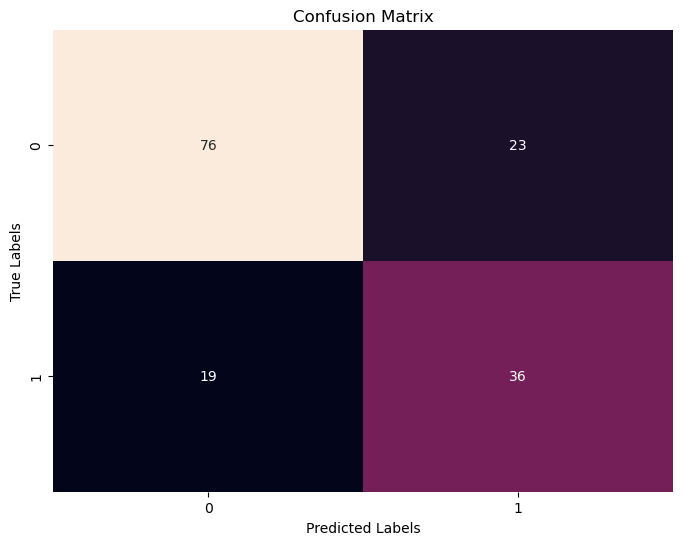

In [74]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [75]:
X_train, X_test, y_train, y_test = train_test_split( 
             X, y, test_size = 0.2, random_state=1)

In [76]:
from sklearn.model_selection import KFold


cv = KFold(n_splits=10)
# perform cross-validation procedure
for train_ix, test_ix in cv.split(X):
    # split data
    X_train, X_test = X[train_ix, :], X[test_ix, :]
    y_train, y_test = y[train_ix], y[test_ix]
    # fit and evaluate a model
    knn = KNeighborsClassifier(n_neighbors=7)
    knn.fit(X_train, y_train) 
    y_pred=knn.predict(X_test)
    print(knn.predict(X_test))
    from sklearn.metrics import confusion_matrix  
    cm= confusion_matrix(y_test,y_pred) 
    print(cm)
    from sklearn.metrics import precision_recall_fscore_support
    precision, recall, f1_score,_ = precision_recall_fscore_support(y_test, y_pred)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1_score) 

[0 0 1 0 1 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0
 0 0 0]
[[35 10]
 [16 16]]
Precision: [0.68627451 0.61538462]
Recall: [0.77777778 0.5       ]
F1 Score: [0.72916667 0.55172414]
[0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 1 0 0
 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0
 0 1 1]
[[50  5]
 [ 9 13]]
Precision: [0.84745763 0.72222222]
Recall: [0.90909091 0.59090909]
F1 Score: [0.87719298 0.65      ]
[1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 1 0
 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 1
 1 0 0]
[[37  6]
 [17 17]]
Precision: [0.68518519 0.73913043]
Recall: [0.86046512 0.5       ]
F1 Score: [0.7628866  0.59649123]
[0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 1 0
 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 1 0]
[[36 11]

In [77]:
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support

# Define the KFold cross-validation
cv = KFold(n_splits=9)

param_grid = {'n_neighbors': list(range(1, 51, 2))}



# Initialize the KNN classifier
knn = KNeighborsClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=cv, scoring='accuracy')

# Perform cross-validation procedure with GridSearchCV
for train_ix, test_ix in cv.split(X):
    # Split data
    X_train, X_test = X[train_ix, :], X[test_ix, :]
    y_train, y_test = y[train_ix], y[test_ix]

    # Fit model using GridSearchCV
    grid_search.fit(X_train, y_train)

    # Get the best KNN model found by GridSearchCV
    best_knn = grid_search.best_estimator_

    # Predict
    y_pred = best_knn.predict(X_test)

    # Evaluate
    cm = confusion_matrix(y_test, y_pred)
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred)
    
    # Print results
    print("Confusion Matrix:")
    print(cm)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1_score)

    # You can also access the best hyperparameters found
    print("Best parameters found by GridSearchCV:", grid_search.best_params_)


Confusion Matrix:
[[45  7]
 [16 18]]
Precision: [0.73770492 0.72      ]
Recall: [0.86538462 0.52941176]
F1 Score: [0.79646018 0.61016949]
Best parameters found by GridSearchCV: {'n_neighbors': 13}
Confusion Matrix:
[[49 10]
 [14 13]]
Precision: [0.77777778 0.56521739]
Recall: [0.83050847 0.48148148]
F1 Score: [0.80327869 0.52      ]
Best parameters found by GridSearchCV: {'n_neighbors': 21}
Confusion Matrix:
[[39 10]
 [20 17]]
Precision: [0.66101695 0.62962963]
Recall: [0.79591837 0.45945946]
F1 Score: [0.72222222 0.53125   ]
Best parameters found by GridSearchCV: {'n_neighbors': 11}
Confusion Matrix:
[[38 12]
 [19 16]]
Precision: [0.66666667 0.57142857]
Recall: [0.76       0.45714286]
F1 Score: [0.71028037 0.50793651]
Best parameters found by GridSearchCV: {'n_neighbors': 13}
Confusion Matrix:
[[51  2]
 [15 17]]
Precision: [0.77272727 0.89473684]
Recall: [0.96226415 0.53125   ]
F1 Score: [0.85714286 0.66666667]
Best parameters found by GridSearchCV: {'n_neighbors': 25}
Confusion Matri